# 문제정의
[분석 보고서] https://docs.google.com/document/d/1q8urRO0THnnaJe-mWSEdr65qOGs3JQ06i4pt2GUZquQ/edit?usp=sharing

# 데이터 이해

체크리스트
- 각 피처의 의미 파악
- 타깃 변수(Churn) 분포 확인
- 결측치 / 이상치 존재 여부

이 과정에서 데이터의 성격/변수의 의미/타겟 변수(Churn)의 분포를 정확히 파악한다.

## 데이터의 크기 & 구조 확인

In [ ]:
import pandas as pd

df = pd.read_csv(".\data\cust_data_v1.csv")
df.head()


#데이터 불러오기 그리고 데이터가 정상적으로 로드되는지 확인 후 행(row) 하나가 고객 1명인지.

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,NaN,0.0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,NaN,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2,Yes,No,DSL,Yes,...,NaN,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45,No,No phone service,DSL,Yes,...,NaN,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2,Yes,No,Fiber optic,No,...,NaN,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape

(7043, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7034 non-null   object 
 2   SeniorCitizen     7042 non-null   float64
 3   Partner           7043 non-null   object 
 4   Dependents        7041 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7040 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  3580 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7042 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
본 데이터셋은 7043명의 고객과 21개의 변수로 구성되어있다.

In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### 타깃 변수(Churn)분포 확인

요금 관련(비교 대상1)
- MonthlyCharges
- TotalCharges

경험 누적 관련(비교 대상2)
- Tenure
- OnlineSecurity / TechSupport / DeviceProtection
- Streaming TV / StreamingMovies

계약·관계 요인
- Contract
- PaymentMethod
- PaperlessBilling

타깃
- Churn

In [7]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [8]:
df['Churn'].value_counts(normalize=True) * 100

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

In [ ]:
전체 고객 중 약 26.54%가 이탈 고객으로 나타났으며 이는 이탈분석을 위한 충분한 표본을 제공한다. 
4명 중 1명이 떠난다. 

In [ ]:
# 결측치 확인
df.isnull().sum()

# DeviceProtection: 3463개 결측
# internetService = no 인 고객에는 의미없는 변수

# 본 데이터셋의 일부 결측치는 서비스 미이용에 따른 구조적 결측으로 판단되며, 이는 전처리 단계에서 적절히 반영한다.

customerID             0
gender                 9
SeniorCitizen          1
Partner                0
Dependents             2
tenure                 0
PhoneService           3
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection    3463
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               1
PaperlessBilling       0
PaymentMethod          1
MonthlyCharges         1
TotalCharges           0
Churn                  0
dtype: int64

In [10]:
# 수치형 변수 기초 통계 확인
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7042.000000,7043.000000,7042.000000
mean,0.162170,32.371149,64.763256
std,0.368633,24.559481,30.091898
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


tenure (가입 기간)
- 평균: 32개월
- 최소: 0개월
- 최대: 72개월
단기 ~ 장기 고객이 고르게 분포
→ “경험의 누적” 분석에 최적
----------------------
MonthlyCharges (월 요금)
- 평균: 약 65
- 표준편차: 30 (꽤 큼)
- 범위: 18 ~ 118
고객 간 요금 편차가 큼
→ “요금 vs 이탈” 비교 가치 충분
----------------------
SeniorCitizen
- 평균 0.16 → 약 16%
특정 소수 집단 존재
→ 고령 고객 이탈 같은 서브 인사이트 가능

전체 고객 중 약 26.5%가 이탈 고객으로 나타났으며, 이는 통신사 고객 이탈이 개별 사례가 아닌 구조적 문제임을 시사한다. 해당 비율은 이탈 원인 분석 및 고객 세분화를 수행하기에 충분한 표본을 제공한다.

# 데이터 전처리

체크리스트
- 결측치 처리
- 범주형 변수 인코딩(설명 포함)
- 불필요한 컬럼 제거

이 과정에서 데이터를 분석 목적에 맞게 해석 가능한 형태로 정리한다.

##  Customer ID 제거
이유: 식별자일 뿐 이탈 설명력 없음

In [ ]:
df = df.drop(columns=['customerID'])

## Churn변수 이진화
이유: 평균, 그룹 비교 시 해석 쉬움

In [28]:
df['Churn_binary'] = df['Churn'].map({'No': 0, 'Yes': 1})

## 결측치 처리

In [30]:
df.isnull().sum()

gender                 0
SeniorCitizen          0
Partner                0
Dependents             1
tenure                 0
PhoneService           0
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection    3456
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
Churn                  0
Churn_binary           0
dtype: int64

In [31]:
df = df.dropna(subset=[
    'gender', 'SeniorCitizen', 'PhoneService',
    'Contract', 'PaymentMethod', 'MonthlyCharges'
])

결측 비율이 매우 낮아 분석 왜곡 가능성이 제한적이므로 해당 행을 제거하였다.

In [33]:
# DeviceProtection 결측치 (구조적 결측)
df['DeviceProtection'] = df['DeviceProtection'].fillna('No_Service')

DeviceProtection 변수의 결측치는 서비스 미이용에 따른 구조적 결측으로 판단하여, 별도 범주(No_Service)로 처리하였다.

## TotalCharges 타입 점검

In [26]:
df['TotalCharges'].dtype

dtype('O')

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [37]:
df['TotalCharges'].dtype

dtype('float64')

In [38]:
df['TotalCharges'].isnull().sum()

11

In [39]:
df['TotalCharges'] = df['TotalCharges'].fillna(0)

가입 초기 고객의 경우 누적 요금이 발생하지 않아 0으로 처리하였다.

## 전처리 후 데이터 상태 점검

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7028 entries, 1 to 7041
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7028 non-null   object 
 1   SeniorCitizen     7028 non-null   float64
 2   Partner           7028 non-null   object 
 3   Dependents        7027 non-null   object 
 4   tenure            7028 non-null   int64  
 5   PhoneService      7028 non-null   object 
 6   MultipleLines     7028 non-null   object 
 7   InternetService   7028 non-null   object 
 8   OnlineSecurity    7028 non-null   object 
 9   OnlineBackup      7028 non-null   object 
 10  DeviceProtection  7028 non-null   object 
 11  TechSupport       7028 non-null   object 
 12  StreamingTV       7028 non-null   object 
 13  StreamingMovies   7028 non-null   object 
 14  Contract          7028 non-null   object 
 15  PaperlessBilling  7028 non-null   object 
 16  PaymentMethod     7028 non-null   object 
 17  

In [41]:
df.isnull().sum

<bound method DataFrame.sum of       gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
1      False          False    False       False   False         False   
2      False          False    False       False   False         False   
3      False          False    False       False   False         False   
4      False          False    False       False   False         False   
5      False          False    False       False   False         False   
...      ...            ...      ...         ...     ...           ...   
7037   False          False    False       False   False         False   
7038   False          False    False       False   False         False   
7039   False          False    False       False   False         False   
7040   False          False    False       False   False         False   
7041   False          False    False       False   False         False   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  ...  \
1    

## 점검 결과
- 총 행 수: 7,028
- 컬럼 수: 21
- 메모리/구조 이상 없음

타입 확인
- MonthlyCharges → float64
- TotalCharges → float64 
- tenure → int64 
- Churn_binary → int64 

# 탐색적 데이터 분석(EDA)

체크리스트
- 평균 + 분산
- 단일 변수 X → 조합 분석 O
- 그래프 + 해석 문장

이 과정에서 데이터로 우리의 가설을 검증할 수 있는 질문과 증거를 설계한다.

## EDA 설계 표 (핵심 산출물)

| 분석 질문                       | 사용 피처                              | 분석 방법    | 시각화          | 기대 인사이트                  |
| --------------------------- | ---------------------------------- | -------- | ------------ | ------------------------ |
| Q1. 이탈은 요금 수준 때문인가?         | MonthlyCharges, Churn              | 그룹 평균 비교 | 박스플롯 / 히스토그램 | 요금이 높아도 이탈하지 않는 고객 존재 여부 |
| Q2. 가입 기간이 길수록 이탈이 줄어드는가?   | tenure, Churn                      | 평균·분포 비교 | 박스플롯         | 단기 고객 vs 장기 고객 이탈 차이     |
| Q3. 서비스 이용 경험은 이탈에 영향을 주는가? | TechSupport, OnlineSecurity, Churn | 이탈률 비교   | 막대그래프        | 지원 서비스 미이용 고객의 이탈 집중 여부  |
| Q4. 요금보다 ‘경험 누적’이 더 중요한가?   | tenure × MonthlyCharges × Churn    | 교차 비교    | 그룹 막대그래프     | 고요금·장기 고객의 이탈률           |
| Q5. 반드시 유지해야 할 고객은 누구인가?    | TotalCharges, tenure, Churn        | 고객 가치 구분 | 산점도          | 고가치 고객 중 이탈 고객 식별        |


Q1. 이탈은 요금 때문인가?

- 단순 평균만 보지 않기
- 이탈 고객과 비이탈 고객의 분포 겹침 여부가 중요

요금이 높다는 이유만으로 고객이 이탈하지는 않는다.

Q2. 가입 기간(tenure)은 왜 중요한가?

- tenure = 경험의 누적 시간
- 이탈을 “사건”이 아니라 “과정”으로 볼 수 있음

이탈은 초기에 집중된다.

Q3. 서비스 이용 경험

- TechSupport, OnlineSecurity는 불만 해소 장치
- ‘No’인 고객의 이탈률이 핵심

“문제는 요금이 아니라, 해결되지 않은 불편이다.

Q4. 요금 × 경험 누적 (핵심 분석)

- 고요금 + 장기 고객이 안 떠난다면?
- 저요금 + 단기 고객이 많이 떠난다면?

요금보다 관계가 중요하다.

Q5. 반드시 유지해야 할 고객

- 이탈 고객 중에서도:
- TotalCharges 높음
- tenure 길음

모든 이탈이 같은 손실은 아니다.

### Q1. 이탈은 요금 수준 때문인가?
월 요금이 높아서 고객이 이탈한다고 단정할 수 있는가?

In [43]:
df.groupby('Churn')['MonthlyCharges'].describe()

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
No,5162.0,61.278071,31.088613,18.25,25.10,64.45,88.4000,118.75
Yes,1866.0,74.439068,24.685130,18.85,56.15,79.65,94.2375,118.35


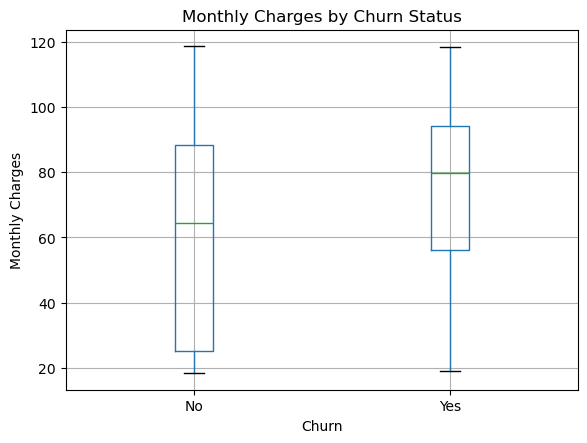

In [44]:
import matplotlib.pyplot as plt

df.boxplot(column='MonthlyCharges', by='Churn')
plt.title('Monthly Charges by Churn Status')
plt.suptitle('')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()

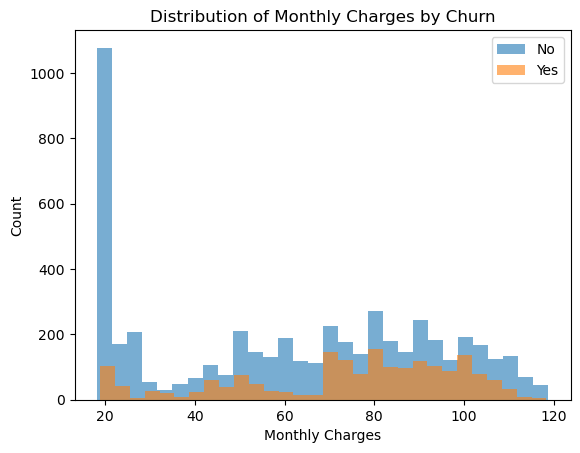

In [45]:
plt.hist(df[df['Churn']=='No']['MonthlyCharges'], bins=30, alpha=0.6, label='No')
plt.hist(df[df['Churn']=='Yes']['MonthlyCharges'], bins=30, alpha=0.6, label='Yes')
plt.xlabel('Monthly Charges')
plt.ylabel('Count')
plt.title('Distribution of Monthly Charges by Churn')
plt.legend()
plt.show()